![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [36]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [37]:
#Nulls y outliers
penguins_df.isna().sum()


culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [38]:
print(penguins_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None


In [39]:
#Eliminar columnas no numericas
penguins_df = penguins_df.dropna()

penguinsNew = penguins_df.drop(columns=['sex'])

In [40]:
scaler = StandardScaler()
penguinEscalado = scaler.fit_transform(penguinsNew)

In [41]:
inertia = [KMeans(n_clusters=k, random_state=42).fit(penguinEscalado).inertia_ for k in range(1, 10)]

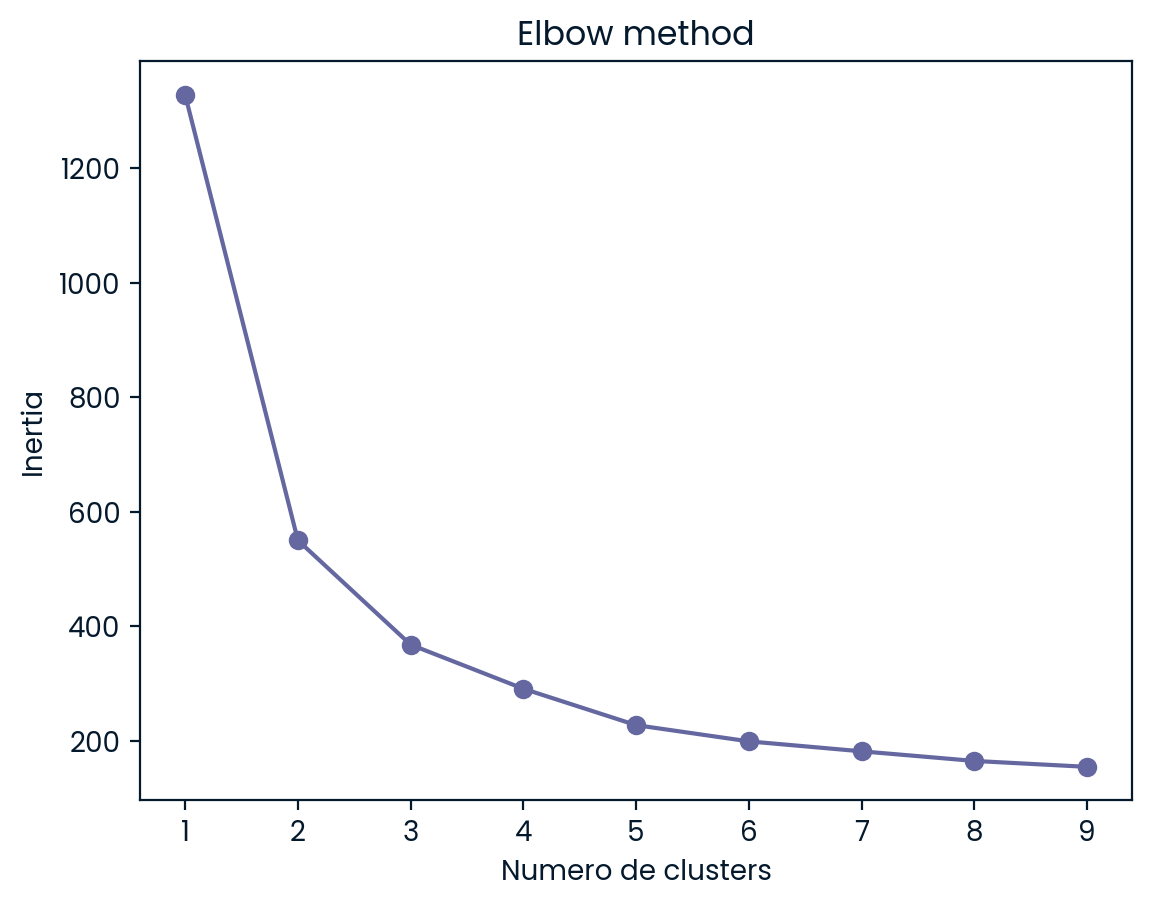

In [42]:
plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=3, random_state=42)
penguins_df['Cluster'] = kmeans.fit_predict(penguinEscalado)

In [52]:
stat_penguins = penguins_df.groupby('Cluster').mean()
print(stat_penguins)

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
Cluster                                                                   
0               47.662353        18.748235         196.917647  3898.235294
1               47.568067        14.996639         217.235294  5092.436975
2               38.305469        18.098437         188.554688  3587.500000


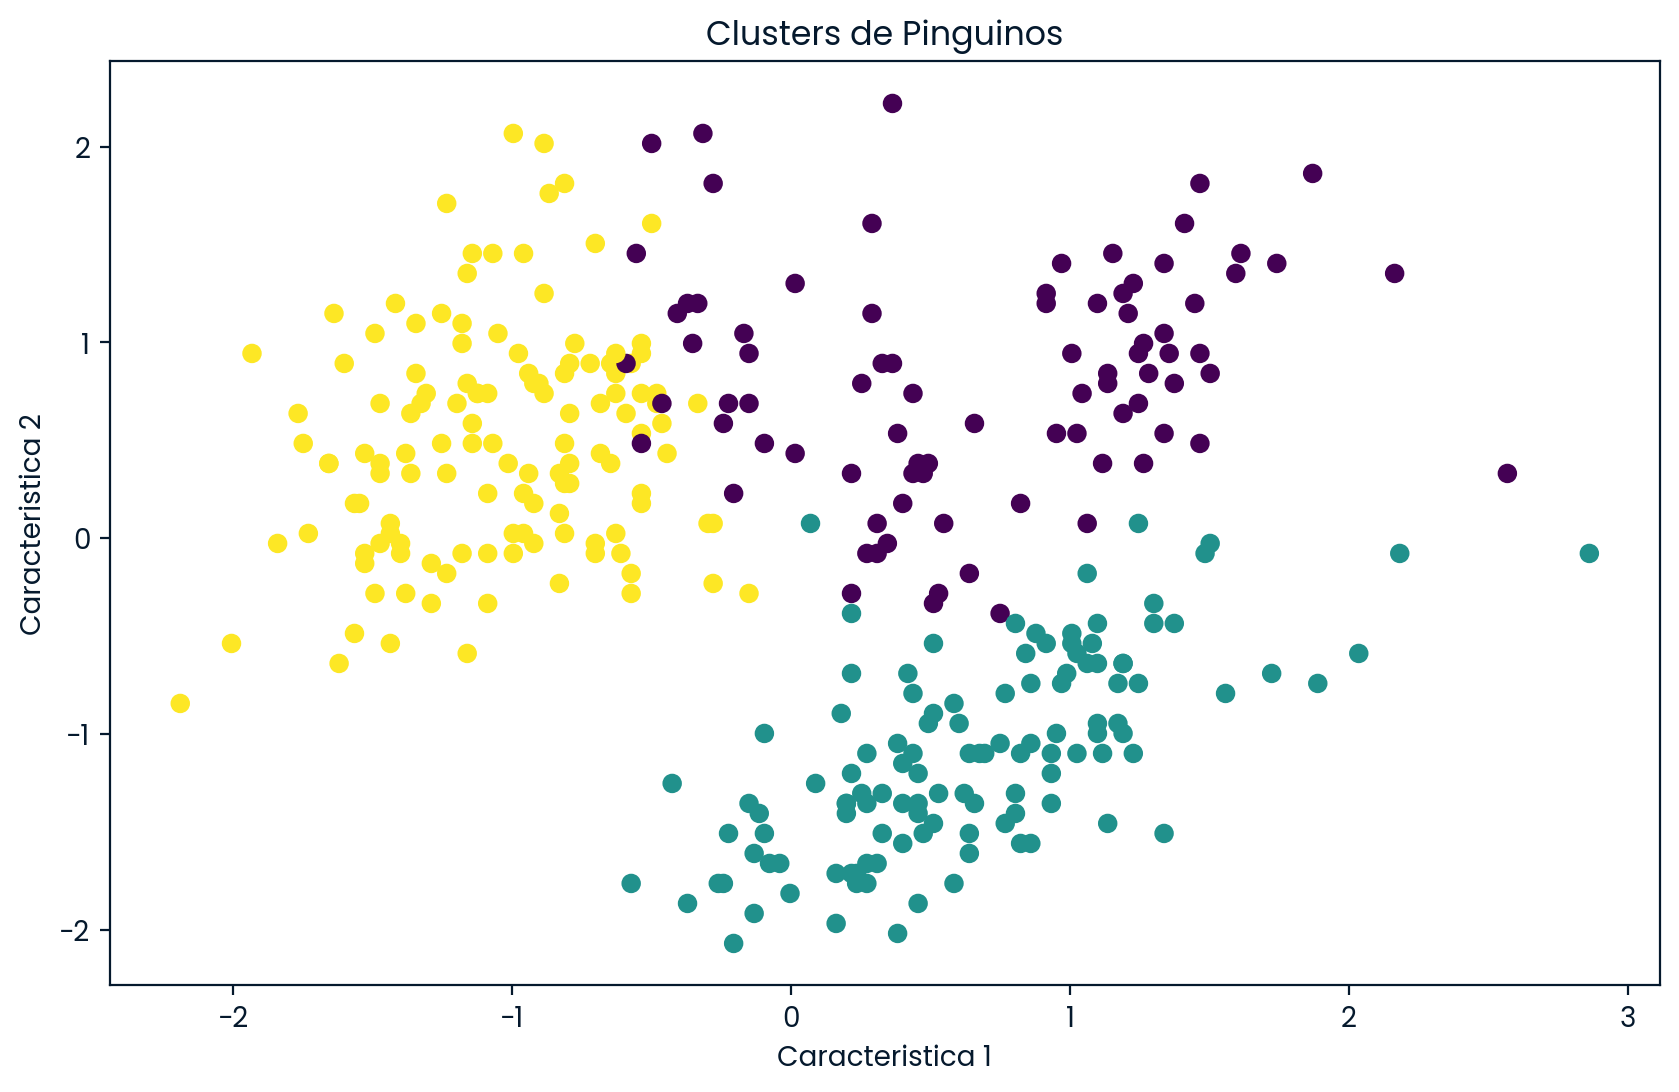

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(penguinEscalado[:, 0], penguinEscalado[:, 1], c=penguins_df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.title('Clusters de Pinguinos')
plt.show()

In [45]:
print(stat_penguins)

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
Cluster                                                                   
0               47.662353        18.748235         196.917647  3898.235294
1               47.568067        14.996639         217.235294  5092.436975
2               38.305469        18.098437         188.554688  3587.500000
